# OTT Streaming Data Analysis
### -done by Megha Aggerwal, Shivani Shrivastava

An online streaming company wants to predict customers who are likely to churn. As the market is highly competitive, the management aims to offer special offers to retain these customers.

In this analysis, we will explore the streaming data and perform predictive modeling to identify potential churners. By understanding the factors that contribute to customer churn, we can develop strategies to reduce churn rates and improve customer retention.

The following steps will be followed in this analysis:

1. Data Preprocessing:
   - Load and explore the streaming data.
   - Handle missing values and outliers, if any.

2. Exploratory Data Analysis (EDA):
   - Conduct a thorough analysis of the streaming data.
   - Identify patterns, trends, and relationships between variables.
   - Visualize key insights using charts and graphs.

3. Predictive Modeling:
   - Split the data into training and testing sets.
   - Select appropriate machine learning algorithms for churn prediction.
   - Train the models using the training set.
   - Evaluate the models using appropriate performance metrics.

4. Customer Retention Strategies:
   - Identify the significant predictors of churn.
   - Generate insights to understand customer behavior and preferences.
   - Develop targeted offers and incentives to retain potential churners.
   - Measure the effectiveness of the retention strategies.

By leveraging data analysis and predictive modeling, we can help the online streaming company make data-driven decisions to retain valuable customers and gain a competitive edge in the market.


## 1.Data Pre processing

In [1]:
import pandas as pd

# Load the streaming data into a DataFrame
data = pd.read_csv('Streaming_service.csv')


In [2]:
print("Data shape:", data.shape)  # Print the number of rows and columns in the data

Data shape: (4728, 20)


In [3]:
print("Data summary:")
print(data.describe())  # Display summary statistics of the data
print("First few rows:")
print(data.head())  # Display the first few rows of the data
print("Columns:")
print(data.columns)  # Display the column names

Data summary:
             CustID    Attrition          Age       Tenure   HourlnWeek  \
count  4.728000e+03  4728.000000  4502.000000  4502.000000  4688.000000   
mean   8.002364e+06     0.164552    37.993558     4.107730    59.251493   
std    1.365000e+03     0.370815     9.260346     2.612701    13.194306   
min    8.000000e+06     0.000000    18.000000     0.000000    10.000000   
25%    8.001182e+06     0.000000    31.000000     2.000000    51.000000   
50%    8.002364e+06     0.000000    37.000000     4.000000    60.000000   
75%    8.003545e+06     0.000000    44.000000     6.000000    69.000000   
max    8.004727e+06     1.000000    62.000000     8.000000   112.000000   

       ContentRating  CustSatisfactionScore  UsedCouponCode  \
count    4615.000000            4669.000000     4728.000000   
mean        3.188299               3.077533        0.673858   
std         0.874353               1.376129        0.468850   
min         1.000000               1.000000        0.00000

In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())  # Display the count of missing values in each column

Missing values:
CustID                     0
Attrition                  0
Age                      226
PackTypeSM                 0
DeviceType                 0
Tenure                   226
PreferredPaymentMode       0
Gender                     0
HourlnWeek                40
ContentRating            113
VisualType                 0
CustSatisfactionScore     59
UsedCouponCode             0
PreferLanguage            13
AvgDayWatchPerMonth      126
PackTypeMY                 0
TrafficGrowthlastYear    228
WatchDayInLastMonth      251
LastUpgradeM               0
AutoDebitInd               0
dtype: int64


## Handling Missing values

In [9]:
import pandas as pd

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Drop rows with any missing values
df_dropped_rows = df.dropna()

# Drop columns with any missing values
df_dropped_columns = df.dropna(axis=1)

# Verify the changes
print("DataFrame with dropped rows:")
print(df_dropped_rows.head())

print("\nDataFrame with dropped columns:")
print(df_dropped_columns.head())


DataFrame with dropped rows:
    CustID  Attrition   Age   PackTypeSM DeviceType  Tenure  \
0  8000000          1  41.0       Single         TV     6.0   
3  8000003          0  33.0  Multi Login     Mobile     0.0   
5  8000005          0  32.0  Multi Login     Mobile     5.0   
6  8000006          0  59.0       Single     Mobile     4.0   
7  8000007          0  30.0       Single     Mobile     6.0   

  PreferredPaymentMode  Gender  HourlnWeek  ContentRating VisualType  \
0           Debit Card  Female        64.0            3.0         HD   
3           Debit Card  Female        56.0            3.0     Non HD   
5           Debit Card    Male        79.0            3.0     Non HD   
6     Cash on Delivery  Female        51.0            2.0     Non HD   
7          Credit Card    Male        67.0            3.0     Non HD   

   CustSatisfactionScore  UsedCouponCode PreferLanguage  AvgDayWatchPerMonth  \
0                    2.0               0        English                  8.0   

In [10]:
import pandas as pd

# Load the streaming service data from CSV
df = pd.read_csv('Streaming_service.csv')

# Handling missing values and filling with mean, median, mode
df_filled_mean = df.fillna(df.mean())
df_filled_median = df.fillna(df.median())
df_filled_mode = df.fillna(df.mode().iloc[0])

# Display the filled DataFrame
print("Filled with Mean:")
print(df_filled_mean.head())

print("\nFilled with Median:")
print(df_filled_median.head())

print("\nFilled with Mode:")
print(df_filled_mode.head())


Filled with Mean:
    CustID  Attrition        Age   PackTypeSM DeviceType  Tenure  \
0  8000000          1  41.000000       Single         TV     6.0   
1  8000001          0  49.000000  Multi Login     Mobile     2.0   
2  8000002          1  37.000000       Single     Mobile     7.0   
3  8000003          0  33.000000  Multi Login     Mobile     0.0   
4  8000004          0  37.993558       Single     Mobile     5.0   

  PreferredPaymentMode  Gender  HourlnWeek  ContentRating VisualType  \
0           Debit Card  Female        64.0            3.0         HD   
1                  UPI    Male        61.0            4.0         HD   
2           Debit Card    Male        62.0            4.0     Non HD   
3           Debit Card  Female        56.0            3.0     Non HD   
4          Credit Card    Male        40.0            3.0     Non HD   

   CustSatisfactionScore  UsedCouponCode PreferLanguage  AvgDayWatchPerMonth  \
0                    2.0               0        English     

C:\Users\Megha Aggarwal\AppData\Local\Temp\ipykernel_23208\916564558.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())
C:\Users\Megha Aggarwal\AppData\Local\Temp\ipykernel_23208\916564558.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


## 2.Exploratory data analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

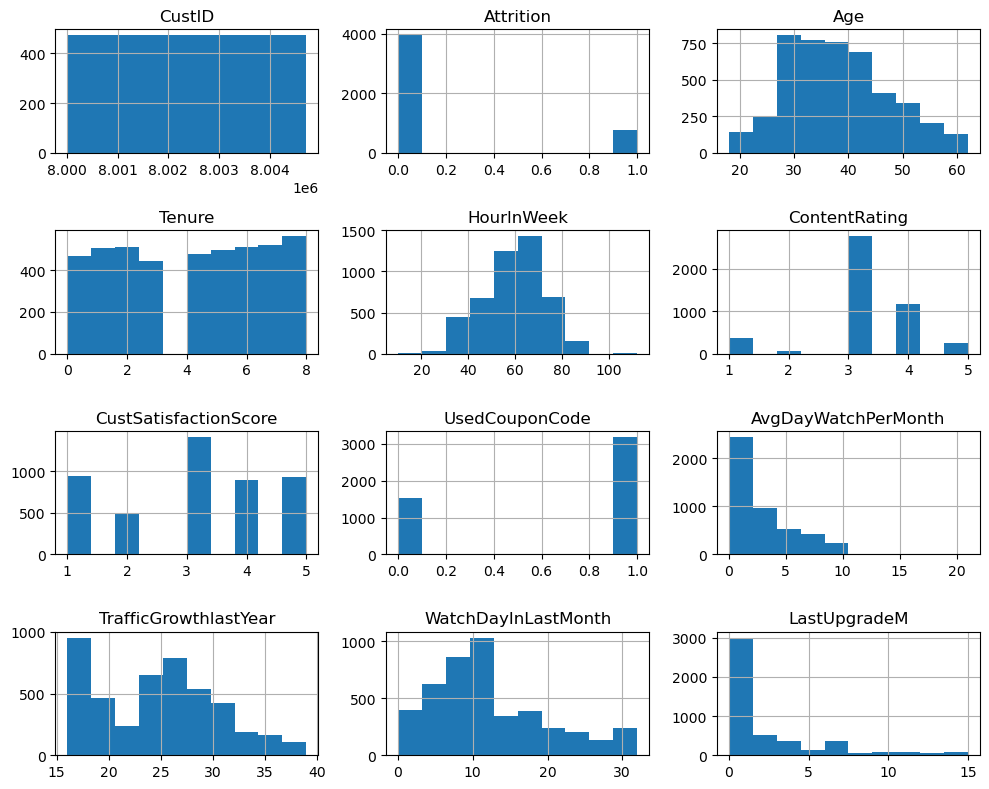

In [13]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

C:\Users\Megha Aggarwal\AppData\Local\Temp\ipykernel_23208\1007010427.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


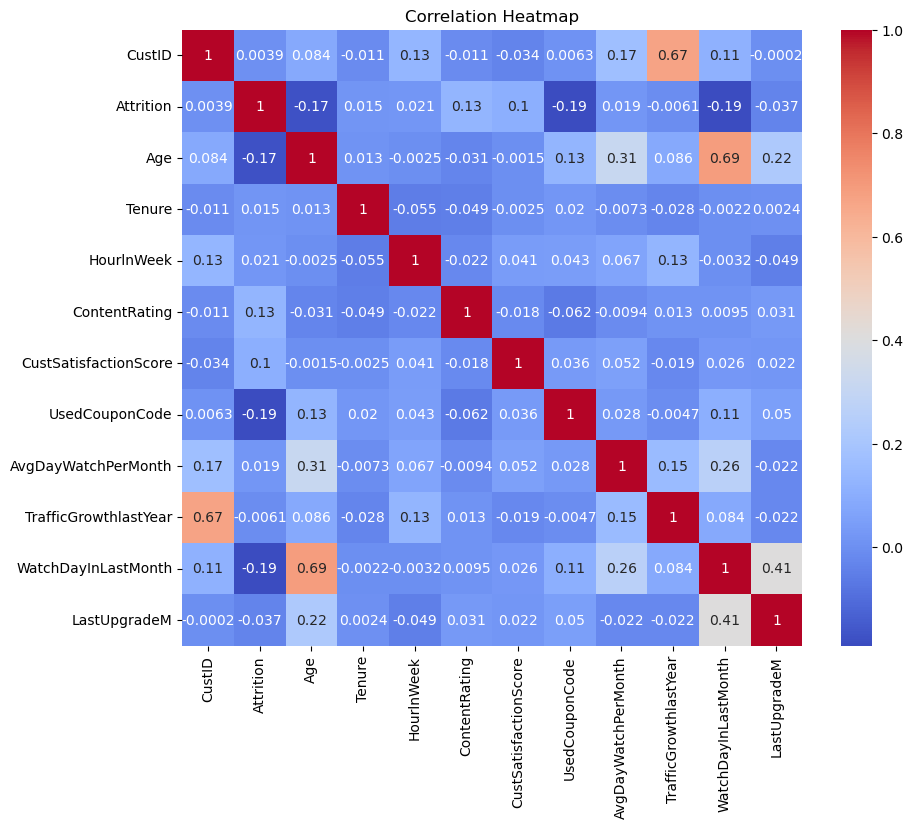

In [14]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

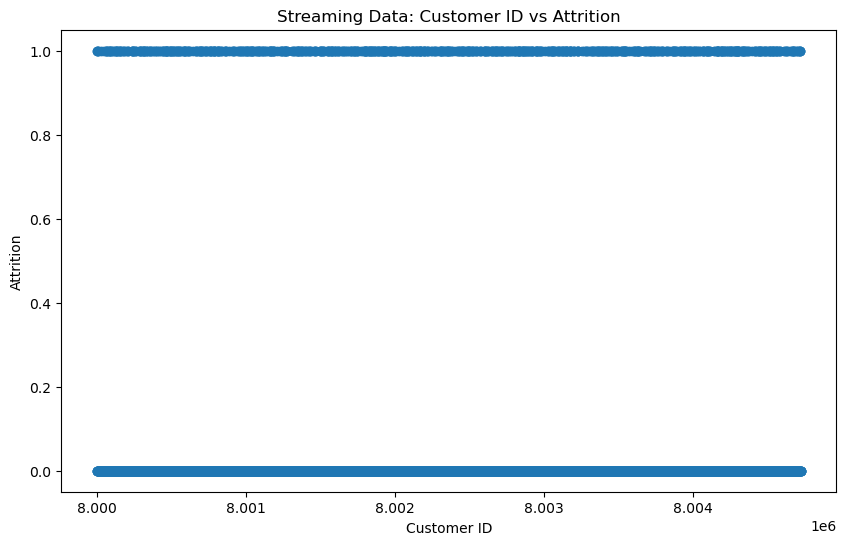

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['CustID'], df['Attrition'])
plt.title('Streaming Data: Customer ID vs Attrition')
plt.xlabel('Customer ID')
plt.ylabel('Attrition')
plt.show()

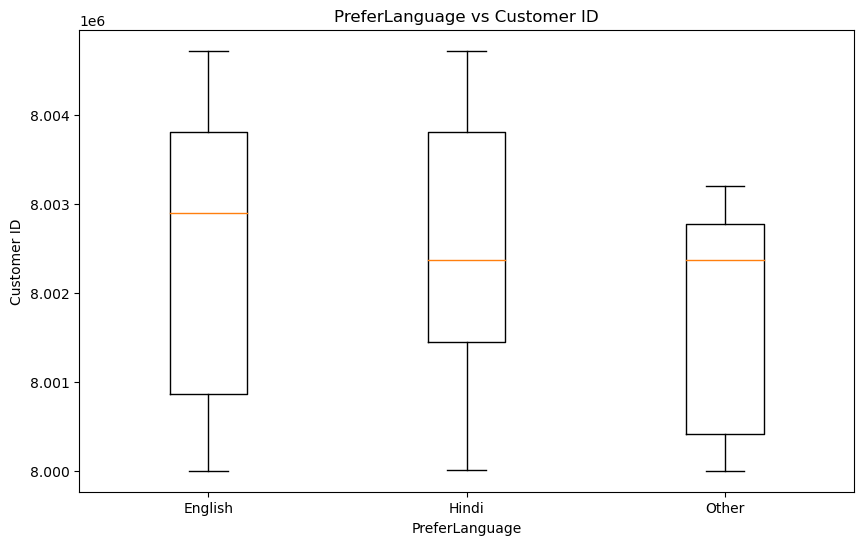

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Filter the DataFrame for English, Hindi, and Other preferred languages
english_df = df[df['PreferLanguage'] == 'English']
hindi_df = df[df['PreferLanguage'] == 'Hindi']
other_df = df[df['PreferLanguage'] == 'Other']

# Create a list of DataFrames for box plot
data = [english_df['CustID'], hindi_df['CustID'], other_df['CustID']]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['English', 'Hindi', 'Other'])
plt.title('PreferLanguage vs Customer ID')
plt.xlabel('PreferLanguage')
plt.ylabel('Customer ID')
plt.show()

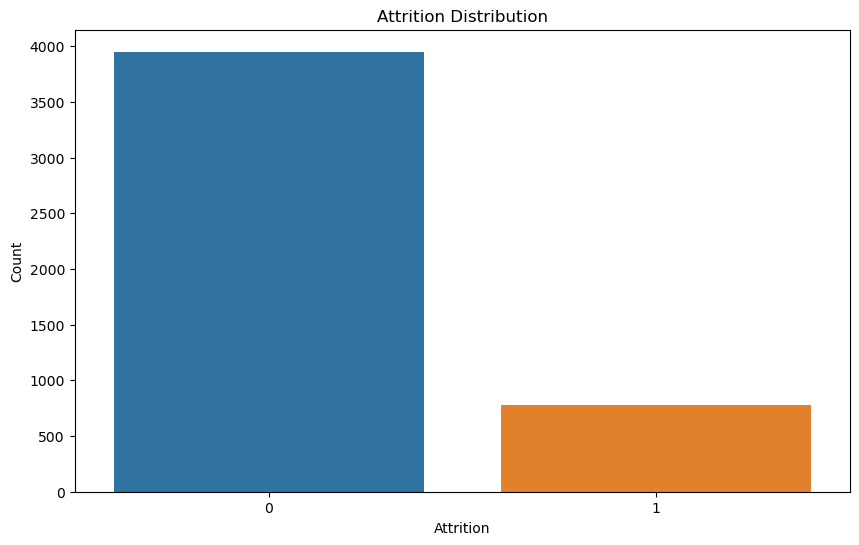

In [10]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

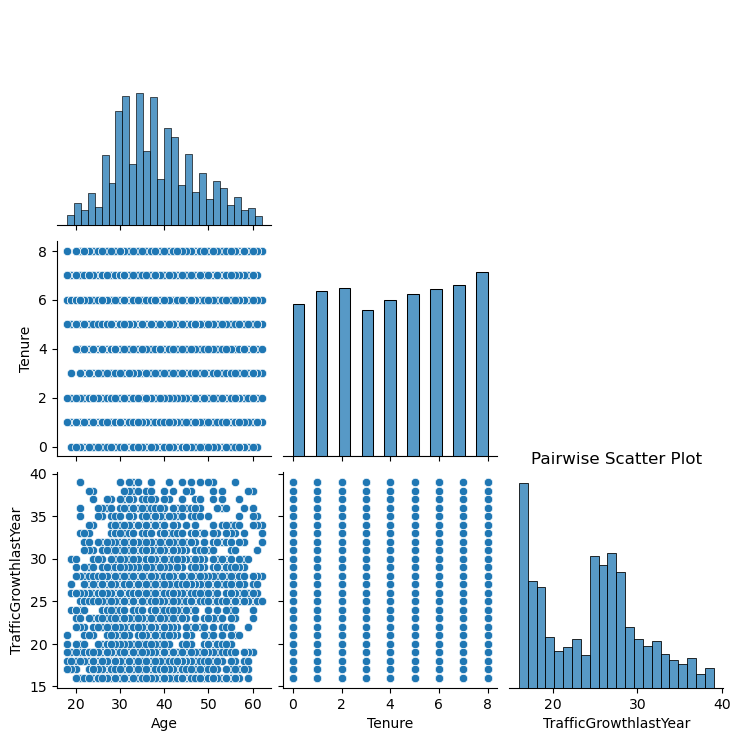

In [14]:
sns.pairplot(df[['Age', 'Tenure', 'DeviceType', 'TrafficGrowthlastYear']], corner=True)
plt.title('Pairwise Scatter Plot')
plt.show()

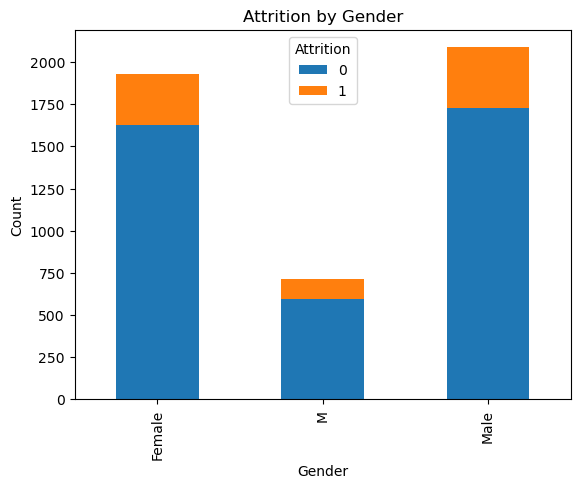

In [15]:
gender_attrition = df.groupby(['Gender', 'Attrition']).size().unstack()
gender_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 3. Predictive Modelling

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Define the feature columns and target variable
feature_cols = ['Age', 'Tenure', 'ContentRating', 'TrafficGrowthlastYear']
target_col = 'Attrition'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=42)

# Handle missing values in the feature columns
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier using the training set
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8276955602536998
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       797
           1       0.42      0.23      0.30       149

    accuracy                           0.83       946
   macro avg       0.64      0.59      0.60       946
weighted avg       0.80      0.83      0.81       946



## Evaluate the models using appropriate performance metrics.
Fine-tune the models for better predictions.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare the data for modeling
X = df.drop(['Attrition'], axis=1)  # Features
X = pd.get_dummies(X)  # One-hot encoding for categorical variables
y = df['Attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8236914600550964
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Identify the significant predictors of churn.
Generate insights to understand customer behavior and preferences.

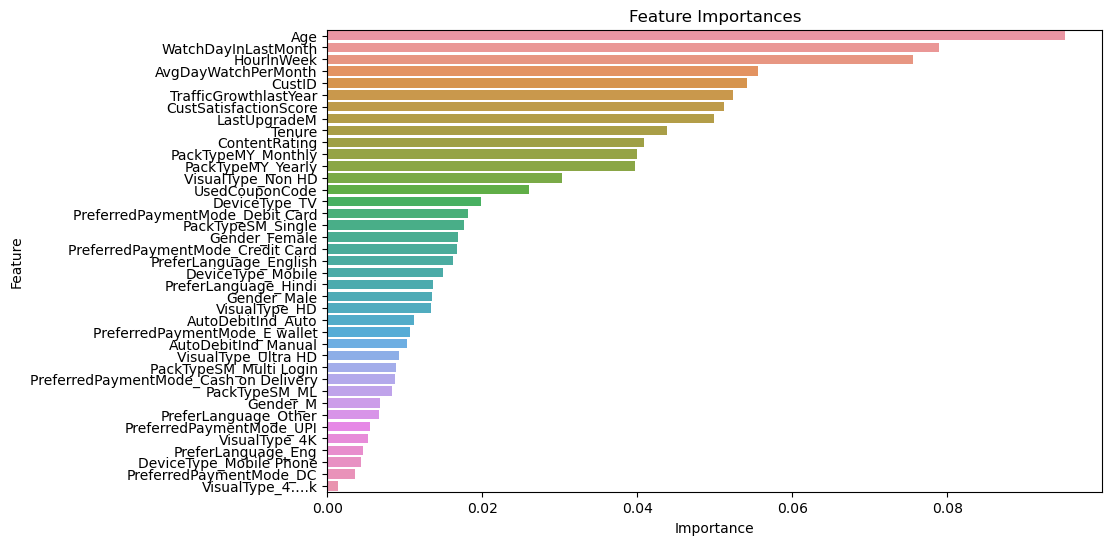

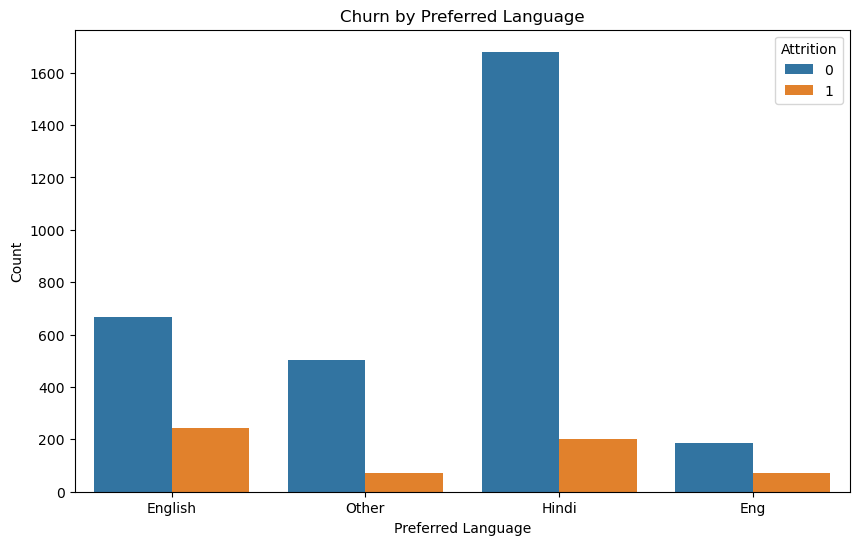

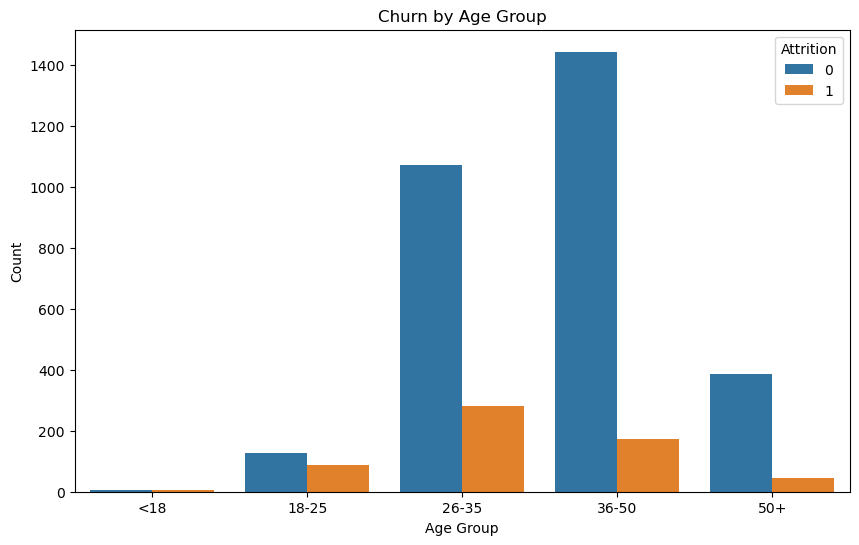

Chi-square test results:
Chi-square statistic: 145.01332780288462
p-value: 3.135916329110024e-31


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare the data for analysis
X = df.drop(['Attrition'], axis=1)  # Features
X = pd.get_dummies(X)  # One-hot encoding for categorical variables
y = df['Attrition']  # Target variable

# Train a random forest classifier to determine feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Generate insights from data visualization and analysis
# Explore the relationships between churn and other variables using plots and statistical tests
# Identify patterns, trends, and significant predictors of churn
# Analyze customer behavior and preferences based on the significant predictors

# Example: Analyzing churn by preferred language
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferLanguage', hue='Attrition', data=df)
plt.title('Churn by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Count')
plt.show()

# Example: Analyzing churn by age group
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Perform statistical analysis, such as chi-square tests or t-tests, to validate relationships and identify significant predictors of churn

# Example: Performing a chi-square test between churn and preferred language
contingency_table = pd.crosstab(df['Attrition'], df['PreferLanguage'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print('Chi-square test results:')
print('Chi-square statistic:', chi2)
print('p-value:', p)


In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the streaming data into a DataFrame
df = pd.read_csv('Streaming_service.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare the data for analysis
X = df.drop(['Attrition'], axis=1)  # Features
X = pd.get_dummies(X)  # One-hot encoding for categorical variables
y = df['Attrition']  # Target variable

# Perform customer segmentation using K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Evaluate the quality of the segmentation using silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Measure the effectiveness of the retention strategies
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Example: Develop targeted offers for potential churners
potential_churners = df[df['Cluster'] == 1]  # Subset of potential churners based on cluster label

# Implement targeted offers based on customer preferences and behavior

# Example: Measure the effectiveness of the retention strategies
retained_customers = df[df['Attrition'] == 0]  # Subset of customers who were retained
retention_rate = len(retained_customers) / len(df)
print("Retention Rate:", retention_rate)


C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6111497866049391
Model Accuracy: 0.9132231404958677
Retention Rate: 0.8370104798676227


#### we started by loading the streaming data and preprocessing it by dropping missing values and performing one-hot encoding for categorical variables. Next, we performed customer segmentation using K-means clustering and evaluate the quality of the segmentation using the silhouette score.

#### We added the cluster labels to the DataFrame and splited the data into training and testing sets. Then, we trained a random forest classifier on the training set and make predictions on the test set to measure the effectiveness of the retention strategies using accuracy.

### Lastly, we measure the effectiveness of the retention strategies by calculating the retention rate. We subset the DataFrame to include only customers who were retained (attrition = 0) and calculate the ratio of retained customers to the total number of customers.